# DOMAIN: Telecom

## PROJECT OBJECTIVE: Build a model that will help to identify the potential customers who have a higher probability to churn. This help the company to understand the pain-points and patterns of customer churn and will increase the focus on strategising customer retention

## 1. Import and warehouse data:
## • Import all the given datasets from MYSQL server. Explore shape and size.
## • Merge all datasets onto one and explore final shape and size.

## Solution 1.

Lets import all the essential libraries

In [348]:
import pandas as pd
import numpy as np # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt  # seaborn is based on matplotlib
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 
# tells python to actually display the graphs
import scipy.stats as stats
import seaborn as sns
from statsmodels.stats.weightstats import ztest
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

Importing dataset from SQL server (installed in local machine)

In [349]:
import pyodbc
import pandas as pd
# Some other example server values are
# server = 'localhost\sqlexpress' # for a named instance
# server = 'myserver,port' # to specify an alternate port
server = 'DESKTOP-2R3U15K\SQLEXPRESS' 
database = 'tempdb' 
username = 'DESKTOP-2R3U15K\DELL' 
password = 'charan sparsh baba'  
cnxn = pyodbc.connect(
    Trusted_Connection='Yes',
    Driver='{SQL Server}',
    Server=server,
    Database=database
)

cursor = cnxn.cursor()
# select 26 rows from SQL table to insert in dataframe.
query = "SELECT * FROM dbo.TelcomCustomer_Churn5;"
Data1 = pd.read_sql(query, cnxn)
print(Data1.head(26))

    customerID  gender SeniorCitizen Partner Dependents tenure PhoneService  \
0   7590-VHVEG  Female             0     Yes         No      1           No   
1   5575-GNVDE    Male             0      No         No     34          Yes   
2   3668-QPYBK    Male             0      No         No      2          Yes   
3   7795-CFOCW    Male             0      No         No     45           No   
4   9237-HQITU  Female             0      No         No      2          Yes   
5   9305-CDSKC  Female             0      No         No      8          Yes   
6   1452-KIOVK    Male             0      No        Yes     22          Yes   
7   6713-OKOMC  Female             0      No         No     10           No   
8   7892-POOKP  Female             0     Yes         No     28          Yes   
9   6388-TABGU    Male             0      No        Yes     62          Yes   
10  9763-GRSKD    Male             0     Yes        Yes     13          Yes   
11  7469-LKBCI    Male             0      No        

In [350]:
Data1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes


In [351]:
Data1.shape

(7043, 21)

## 2. Data cleansing:
## • Missing value treatment
## • Convert categorical attributes to continuous using relevant functional knowledge
## • Drop attribute/s if required using relevant functional knowledge
## • Automate all the above steps 

Function-1: Show columns carrying unexpected values and also different classes of values held by the column 
1) Build a function to check for 0s among the continuos variables and print column names and count of values
2) Similarly, for ' ' and special characters carrying object columns, print the column names and count of values


Function-2: Treat columns carrying unexpected values
1) Build a function to replace 0s in the continuos variable columns by mean/mode/median (based on user input)
2) Similarly, for object columns, build a function to replace ' ' and special characters with user provided parameters for each column OR to drop such rows

In [352]:
Data1.dtypes

customerID          object
gender              object
SeniorCitizen       object
Partner             object
Dependents          object
tenure              object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
MonthlyCharges      object
TotalCharges        object
Churn               object
dtype: object

### Automation feature-1 : 
- Automatically check all the columns of the data frame for zeros and blank spaces
- Automatically drop blank spaces

In [353]:
def treat_absurd_values(df): # Defining the automation feature-1 function called treat_absurd_values
    for y in df.columns:
        if(df[y].dtype == np.float64 or df[y].dtype == np.int64):
            if((df[y] == 0).any()):
                print(str(y) + '- Number of zeros found:'+str(np.count_nonzero(df[y]==0))+ ' Count of unique values is:' +str(df[y].nunique()))
        elif(df[y].dtype == np.object):
            if((df[y] == str(' ')).any() or (df[y] == str(' ')).any() or (df[y] == str('')).any() or (df[y] == str('  ')).any()):
                print(str(y) + '- Number of spaces found:'+str(np.count_nonzero(df[y]==str(''))+np.count_nonzero(df[y]==str(' '))+np.count_nonzero(df[y]==str('  ')))+ ' dropping the spaces...')
                df[y].replace('', np.nan, inplace=True)
                df[y].replace(' ', np.nan, inplace=True)
                df[y].replace('  ', np.nan, inplace=True)
                df.dropna(subset=[y], inplace=True)
                print('Rows with blank spaces in the column:'+ str(y)+' have been dropped')

In [354]:
treat_absurd_values(Data1)

TotalCharges- Number of spaces found:11 dropping the spaces...
Rows with blank spaces in the column:TotalCharges have been dropped


In [355]:
Data1.info() #Checking total count of values in each column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7032 non-null   object
 1   gender            7032 non-null   object
 2   SeniorCitizen     7032 non-null   object
 3   Partner           7032 non-null   object
 4   Dependents        7032 non-null   object
 5   tenure            7032 non-null   object
 6   PhoneService      7032 non-null   object
 7   MultipleLines     7032 non-null   object
 8   InternetService   7032 non-null   object
 9   OnlineSecurity    7032 non-null   object
 10  OnlineBackup      7032 non-null   object
 11  DeviceProtection  7032 non-null   object
 12  TechSupport       7032 non-null   object
 13  StreamingTV       7032 non-null   object
 14  StreamingMovies   7032 non-null   object
 15  Contract          7032 non-null   object
 16  PaperlessBilling  7032 non-null   object
 17  PaymentMethod 

TotalCharges is found as non-null object type which should be investigated

In [356]:
Data1.describe(include='all') # Checking summary statistics for all the variables

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,...,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,72,2,3,3,3,...,3,3,3,3,3,2,4,1584,6530,2
top,5692-FPTAH,Male,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,20.05,20.2,No
freq,1,3549,5890,3639,4933,613,6352,3385,3096,3497,...,3094,3472,2809,2781,3875,4168,2365,61,11,5163


There are blank space values (' ') in "TotalCharges" column which should be either imputed or removed

In [357]:
Data1.Churn.value_counts(normalize=True) #Checking data balance in the target variable "Churn"

No     0.734215
Yes    0.265785
Name: Churn, dtype: float64

Since the distribution between "Yes" and "No" is approximately in the ratio of 1:3,the dataset looks good for model building

In [358]:
Data1.TotalCharges.value_counts()

20.2       11
19.75       9
19.65       8
20.05       8
19.9        8
           ..
329.8       1
1215.6      1
6743.55     1
1588.25     1
6225.4      1
Name: TotalCharges, Length: 6530, dtype: int64

In [359]:
Data1.info() #Checking total count of values and datatypes of each column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7032 non-null   object
 1   gender            7032 non-null   object
 2   SeniorCitizen     7032 non-null   object
 3   Partner           7032 non-null   object
 4   Dependents        7032 non-null   object
 5   tenure            7032 non-null   object
 6   PhoneService      7032 non-null   object
 7   MultipleLines     7032 non-null   object
 8   InternetService   7032 non-null   object
 9   OnlineSecurity    7032 non-null   object
 10  OnlineBackup      7032 non-null   object
 11  DeviceProtection  7032 non-null   object
 12  TechSupport       7032 non-null   object
 13  StreamingTV       7032 non-null   object
 14  StreamingMovies   7032 non-null   object
 15  Contract          7032 non-null   object
 16  PaperlessBilling  7032 non-null   object
 17  PaymentMethod 

In [360]:
Data1['TotalCharges'] = Data1['TotalCharges'].astype('float') #Converting the column into float data type

In [361]:
Data1.info() #Checking total count of values in each column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   object 
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [362]:
Data1['TotalCharges'].apply(type).value_counts() #Checking  what all types of data present in column TotalCharges

<class 'float'>    7032
Name: TotalCharges, dtype: int64

### Automation feature-2:
- Show column wise value count for the entire data frame

In [363]:
def show_columnwise_value_counts(df): # Defining automation feature-2 function called show_columnwise_value_counts
    for feature in df.columns: # Loop through all columns in the dataframe
            print(df[feature].value_counts())


In [364]:
show_columnwise_value_counts(Data1)

5692-FPTAH    1
2277-DJJDL    1
4505-EXZHB    1
2718-GAXQD    1
9163-GHAYE    1
             ..
8286-AFUYI    1
3315-IKYZQ    1
1839-FBNFR    1
6176-YJWAS    1
1084-UQCHV    1
Name: customerID, Length: 7032, dtype: int64
Male      3549
Female    3483
Name: gender, dtype: int64
0    5890
1    1142
Name: SeniorCitizen, dtype: int64
No     3639
Yes    3393
Name: Partner, dtype: int64
No     4933
Yes    2099
Name: Dependents, dtype: int64
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64
Yes    6352
No      680
Name: PhoneService, dtype: int64
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64
No                     3087
Yes

We need to  do following replacements before doing encoding of categorical varaibles:
1) Replace "No phone service" with "No" values in the column "PhoneService"

2) Replace "No internet service" with "No" values in the columns: a) "InternetService" b) "OnlineSecurity" c) "DeviceProtection" d) "TechSupport" e) StreamingTV f) StreamingMovies
 

### Automation feature-3:
- Automatically cleanse the data in the columns as defined in the input dataframe (df2)

#### Step:1 - Defining the input data frame df2 as per the requirement

In [365]:
df2 = pd.DataFrame([['No phone service','No'],['No internet service','No'],['Male',1], ['Female',2], ['No',0], ['Yes',1], ['Fiber optic', 2],['DSL', 1],['Month-to-month', 1], ['Two year', 3], ['One year', 2 ]], columns=['Value','Replacement_Value']) # defining dataframe df2

In [366]:
df2

,Value,Replacement_Value
0,No phone service,No
1,No internet service,No
2,Male,1
3,Female,2
4,No,0
5,Yes,1
6,Fiber optic,2
7,DSL,1
8,Month-to-month,1
9,Two year,3


#### Step:2 - Defining the automation function with two parameters: 

- Parent dataframe to be treated 

- Input dataframe df2 which defines how to do the replacement

In [367]:
# Function to correct
def correct_and_replace_values(df, df2):
    for value in df2.iloc[:, 0]: # Loop through all entries in the firs column of dataframe2
        print('Processing for :'+ str(value), flush=True)
        print('Replacing '+ str(df[df==value].count().sum())+' entries with value: ' + str(value) +' to: '+ str(df2[df2.iloc[:,0]==value].iloc[0,1]), flush=True)
        df.replace(value,df2[df2.iloc[:,0]==value].iloc[0,1] ,inplace = True)

In [368]:
df2[df2.iloc[:,0]=='Fiber optic'].iloc[0,1]

2

In [369]:
Data1[Data1=='No internet service'].count().sum()

9120

In [370]:
correct_and_replace_values(Data1, df2)

Processing for :No phone service
Replacing 680 entries with value: No phone service to: No
Processing for :No internet service
Replacing 9120 entries with value: No internet service to: No
Processing for :Male
Replacing 3549 entries with value: Male to: 1
Processing for :Female
Replacing 3483 entries with value: Female to: 2
Processing for :No
Replacing 50724 entries with value: No to: 0
Processing for :Yes
Replacing 35180 entries with value: Yes to: 1
Processing for :Fiber optic
Replacing 3096 entries with value: Fiber optic to: 2
Processing for :DSL
Replacing 2416 entries with value: DSL to: 1
Processing for :Month-to-month
Replacing 3875 entries with value: Month-to-month to: 1
Processing for :Two year
Replacing 1685 entries with value: Two year to: 3
Processing for :One year
Replacing 1472 entries with value: One year to: 2


In [371]:
Data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   int64  
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   tenure            7032 non-null   object 
 6   PhoneService      7032 non-null   int64  
 7   MultipleLines     7032 non-null   int64  
 8   InternetService   7032 non-null   int64  
 9   OnlineSecurity    7032 non-null   int64  
 10  OnlineBackup      7032 non-null   int64  
 11  DeviceProtection  7032 non-null   int64  
 12  TechSupport       7032 non-null   int64  
 13  StreamingTV       7032 non-null   int64  
 14  StreamingMovies   7032 non-null   int64  
 15  Contract          7032 non-null   int64  
 16  PaperlessBilling  7032 non-null   int64  


In [372]:
Data1.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032,7032.000000,7032,7032.000000,7032.000000,7032,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032,7032,7032.000000,7032.000000
unique,7032,NaN,2,NaN,NaN,72,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4,1584,NaN,NaN
top,5692-FPTAH,NaN,0,NaN,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Electronic check,20.05,NaN,NaN
freq,1,NaN,5890,NaN,NaN,613,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2365,61,NaN,NaN
mean,NaN,1.495307,NaN,0.482509,0.298493,NaN,0.903299,0.421928,1.224118,0.286547,...,0.343857,0.290102,0.384386,0.388367,1.688567,0.592719,NaN,NaN,2283.300441,0.265785
std,NaN,0.500014,NaN,0.499729,0.457629,NaN,0.295571,0.493902,0.778643,0.452180,...,0.475028,0.453842,0.486484,0.487414,0.832934,0.491363,NaN,NaN,2266.771362,0.441782
min,NaN,1.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,NaN,NaN,18.800000,0.000000
25%,NaN,1.000000,NaN,0.000000,0.000000,NaN,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,NaN,NaN,401.450000,0.000000
50%,NaN,1.000000,NaN,0.000000,0.000000,NaN,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,NaN,NaN,1397.475000,0.000000
75%,NaN,2.000000,NaN,1.000000,1.000000,NaN,1.000000,1.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,NaN,NaN,3794.737500,1.000000


Columns: tenure, MonthlyCharges and SeniorCitizen should be int float and int respectively. Lets convert them

In [373]:
Data1['tenure'] = Data1['tenure'].astype('int') #Converting the column into int data type
Data1['MonthlyCharges'] = Data1['MonthlyCharges'].astype('float') #Converting the column into float data type
Data1['SeniorCitizen'] = Data1['SeniorCitizen'].astype('int') #Converting the column into int data type

Since we have manually converted all the columns with numerical values into integer and float, we can convert all the rest object columns into categorical

#### Automation feature-4:
- Automatically convert the object data into categorical

Lets convert the columns with an 'object' datatype into categorical variables and check the value count of each column

In [374]:
def convert_object_to_categorical(df):
    for feature in df.columns: # Loop through all columns in the dataframe
        if df[feature].dtype == 'object': # Only apply for columns with categorical strings
            df[feature] = pd.Categorical(df[feature])# Replace strings with an integer
            print('Converted the column: ' + str(feature) +' into categorical type')
            print(df[feature].value_counts())

In [375]:
convert_object_to_categorical(Data1)

Converted the column: customerID into categorical type
9995-HOTOH    1
3372-KWFBM    1
3351-NQLDI    1
3352-ALMCK    1
3352-RICWQ    1
             ..
6625-IUTTT    1
6625-UTXEW    1
6627-CFOSN    1
6629-CZTTH    1
0002-ORFBO    1
Name: customerID, Length: 7032, dtype: int64
Converted the column: PaymentMethod into categorical type
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64


In [376]:
Data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   category
 1   gender            7032 non-null   int64   
 2   SeniorCitizen     7032 non-null   int32   
 3   Partner           7032 non-null   int64   
 4   Dependents        7032 non-null   int64   
 5   tenure            7032 non-null   int32   
 6   PhoneService      7032 non-null   int64   
 7   MultipleLines     7032 non-null   int64   
 8   InternetService   7032 non-null   int64   
 9   OnlineSecurity    7032 non-null   int64   
 10  OnlineBackup      7032 non-null   int64   
 11  DeviceProtection  7032 non-null   int64   
 12  TechSupport       7032 non-null   int64   
 13  StreamingTV       7032 non-null   int64   
 14  StreamingMovies   7032 non-null   int64   
 15  Contract          7032 non-null   int64   
 16  PaperlessBilling  7032 n

In [377]:
#Data1=Data1.replace(replaceStruct)
Data1=pd.get_dummies(Data1, columns=["PaymentMethod"])
Data1.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,2,0,1,0,1,0,0,1,0,...,0,1,1,29.85,29.85,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,0,2,0,56.95,1889.50,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,1,1,53.85,108.15,1,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,1,...,0,2,0,42.30,1840.75,0,1,0,0,0
4,9237-HQITU,2,0,0,0,2,1,0,2,0,...,0,1,1,70.70,151.65,1,0,0,1,0
5,9305-CDSKC,2,0,0,0,8,1,1,2,0,...,1,1,1,99.65,820.50,1,0,0,1,0
6,1452-KIOVK,1,0,0,1,22,1,1,2,0,...,0,1,1,89.10,1949.40,0,0,1,0,0
7,6713-OKOMC,2,0,0,0,10,0,0,1,1,...,0,1,0,29.75,301.90,0,0,0,0,1
8,7892-POOKP,2,0,1,0,28,1,1,2,0,...,1,1,1,104.80,3046.05,1,0,0,1,0
9,6388-TABGU,1,0,0,1,62,1,0,1,1,...,0,2,0,56.15,3487.95,0,1,0,0,0


In [378]:
Data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   customerID                               7032 non-null   category
 1   gender                                   7032 non-null   int64   
 2   SeniorCitizen                            7032 non-null   int32   
 3   Partner                                  7032 non-null   int64   
 4   Dependents                               7032 non-null   int64   
 5   tenure                                   7032 non-null   int32   
 6   PhoneService                             7032 non-null   int64   
 7   MultipleLines                            7032 non-null   int64   
 8   InternetService                          7032 non-null   int64   
 9   OnlineSecurity                           7032 non-null   int64   
 10  OnlineBackup                        

## 3. Data analysis & visualisation: [ Score: 10 point ]
## • Perform detailed statistical analysis on the data.
## • Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis

We can plot histograms for all the columns for doing univariate analysis

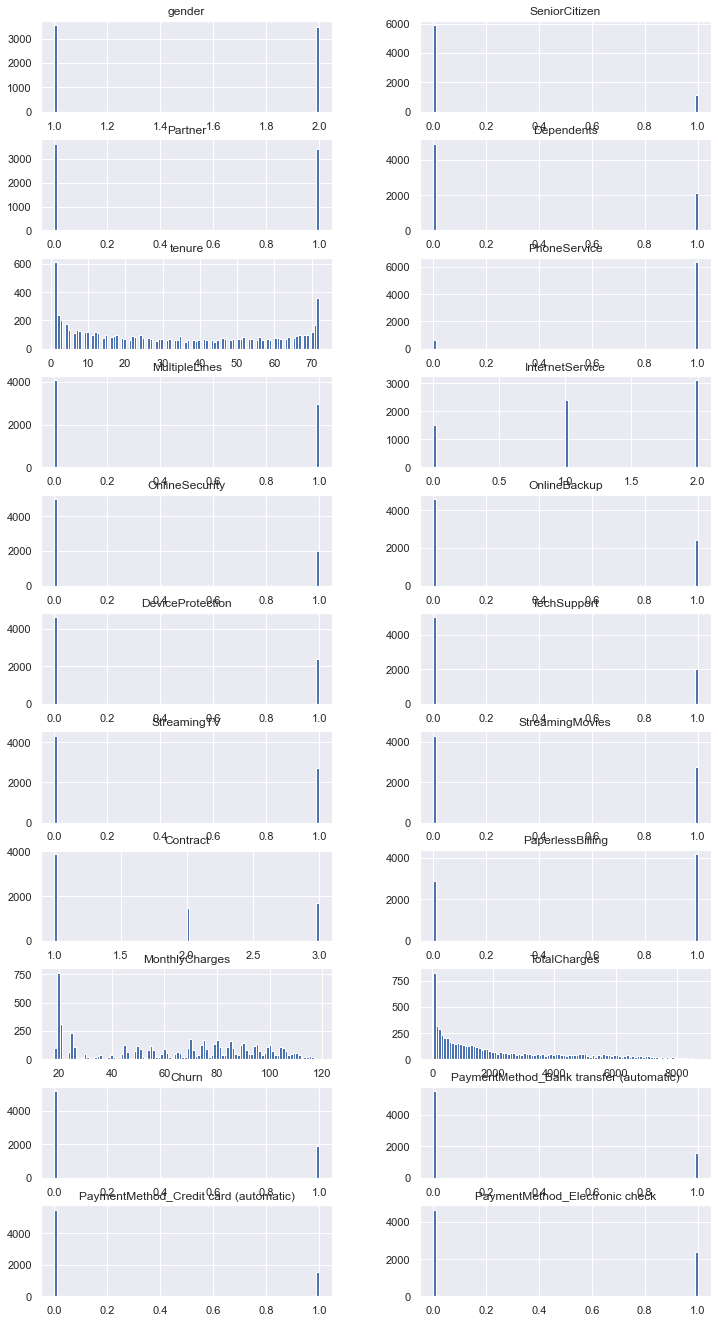

In [379]:
columns = list(Data1)[0:-1] # Excluding Outcome column which has only --commenting for quicker execution
Data1[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 

In [380]:
Data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   customerID                               7032 non-null   category
 1   gender                                   7032 non-null   int64   
 2   SeniorCitizen                            7032 non-null   int32   
 3   Partner                                  7032 non-null   int64   
 4   Dependents                               7032 non-null   int64   
 5   tenure                                   7032 non-null   int32   
 6   PhoneService                             7032 non-null   int64   
 7   MultipleLines                            7032 non-null   int64   
 8   InternetService                          7032 non-null   int64   
 9   OnlineSecurity                           7032 non-null   int64   
 10  OnlineBackup                        

There are:

1) Three continuous varables: tenure, MonthlyCharges and TotalCharges

2) Two categorical variables: InternetService and Contract

3) Sixteen binary variables

#### Checking the presence of outliers in continuous variables: tenure, MonthlyCharges and TotalCharges

<AxesSubplot:xlabel='tenure'>

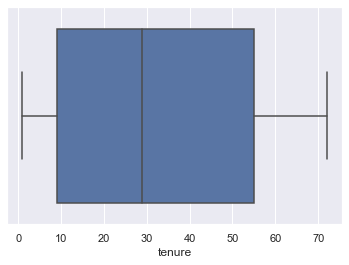

In [381]:
sns.boxplot(x=Data1['tenure']) # Box plot for tenure column

No outliers observed in tenure column

<AxesSubplot:xlabel='MonthlyCharges'>

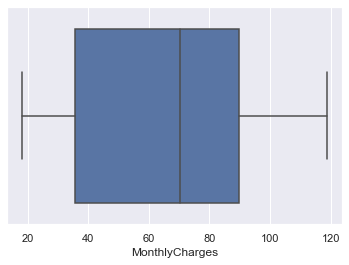

In [382]:
sns.boxplot(x=Data1['MonthlyCharges']) # Box plot for MonthlyCharges column

No outliers observed in MonthlyCharges column

<AxesSubplot:xlabel='TotalCharges'>

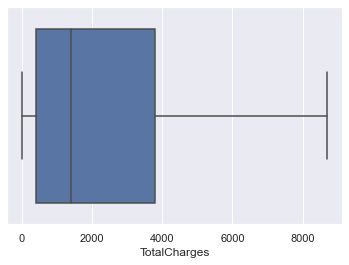

In [383]:
sns.boxplot(x=Data1['TotalCharges']) # Box plot for tenure column

No outliers observed in TotalCharges column

#### Checking the correlation among different independent variables

In [384]:
Data1.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.000000,0.001819,0.001379,-0.010349,-0.005285,0.007515,0.008883,0.009643,0.016328,0.013093,...,0.010105,-0.000095,0.011902,0.013779,-0.000048,0.008545,0.015973,-0.001632,-0.000844,-0.013199
SeniorCitizen,0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.142996,0.259030,-0.038576,0.066663,...,0.119842,-0.141820,0.156258,0.219874,0.102411,0.150541,-0.016235,-0.024359,0.171322,-0.152987
Partner,0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142561,0.000938,0.143346,0.141849,...,0.118108,0.294094,-0.013957,0.097825,0.319072,-0.149982,0.111406,0.082327,-0.083207,-0.096948
Dependents,-0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024307,-0.177789,0.080786,0.023639,...,-0.038375,0.240556,-0.110131,-0.112343,0.064653,-0.163128,0.052369,0.061134,-0.149274,0.056448
tenure,-0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.332399,0.031272,0.328297,0.361138,...,0.285402,0.676734,0.004823,0.246862,0.825880,-0.354049,0.243822,0.232800,-0.210197,-0.232181
PhoneService,0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,0.279530,0.094182,-0.091676,-0.052133,...,-0.033477,0.003019,0.016696,0.248033,0.113008,0.011691,0.008271,-0.006916,0.002747,-0.004463
MultipleLines,0.008883,0.142996,0.142561,-0.024307,0.332399,0.279530,1.000000,0.345068,0.098592,0.202228,...,0.259194,0.107529,0.163746,0.490912,0.469042,0.040033,0.075429,0.060319,0.083583,-0.227672
InternetService,0.009643,0.259030,0.000938,-0.177789,0.031272,0.094182,0.345068,1.000000,0.156493,0.307223,...,0.426820,-0.288855,0.377644,0.905389,0.428212,0.316350,-0.013945,-0.033220,0.364545,-0.364107
OnlineSecurity,0.016328,-0.038576,0.143346,0.080786,0.328297,-0.091676,0.098592,0.156493,1.000000,0.283285,...,0.187426,0.245660,-0.004051,0.296447,0.412619,-0.171270,0.094366,0.115473,-0.112295,-0.079918
OnlineBackup,0.013093,0.066663,0.141849,0.023639,0.361138,-0.052133,0.202228,0.307223,0.283285,1.000000,...,0.274523,0.155262,0.127056,0.441529,0.510100,-0.082307,0.086942,0.090455,-0.000364,-0.174075


In [385]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

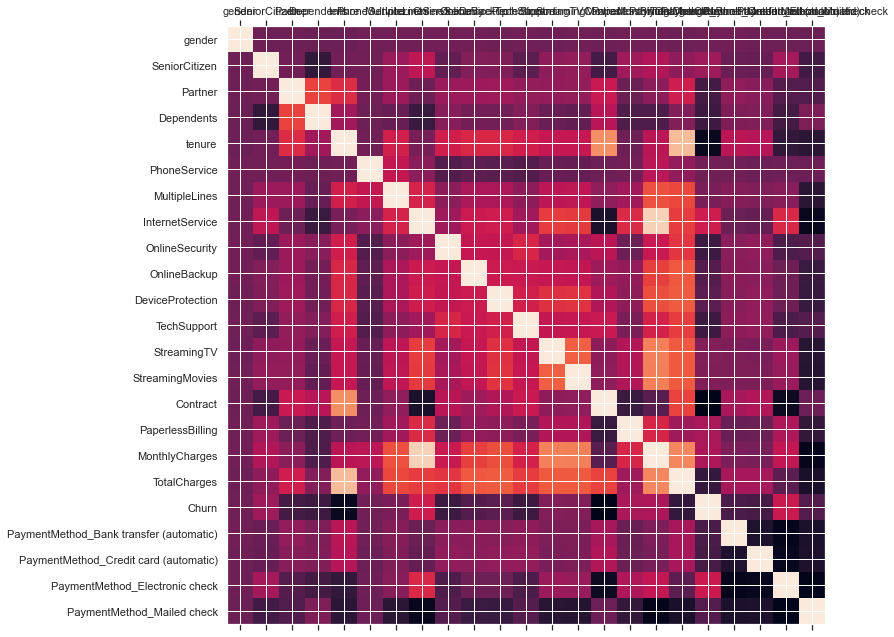

In [386]:
plot_corr(Data1)

There is a good positive correlation between:

1) Total charges and tenure

2) Multiple lines and MonthlyCharges

Such correlations are understandable

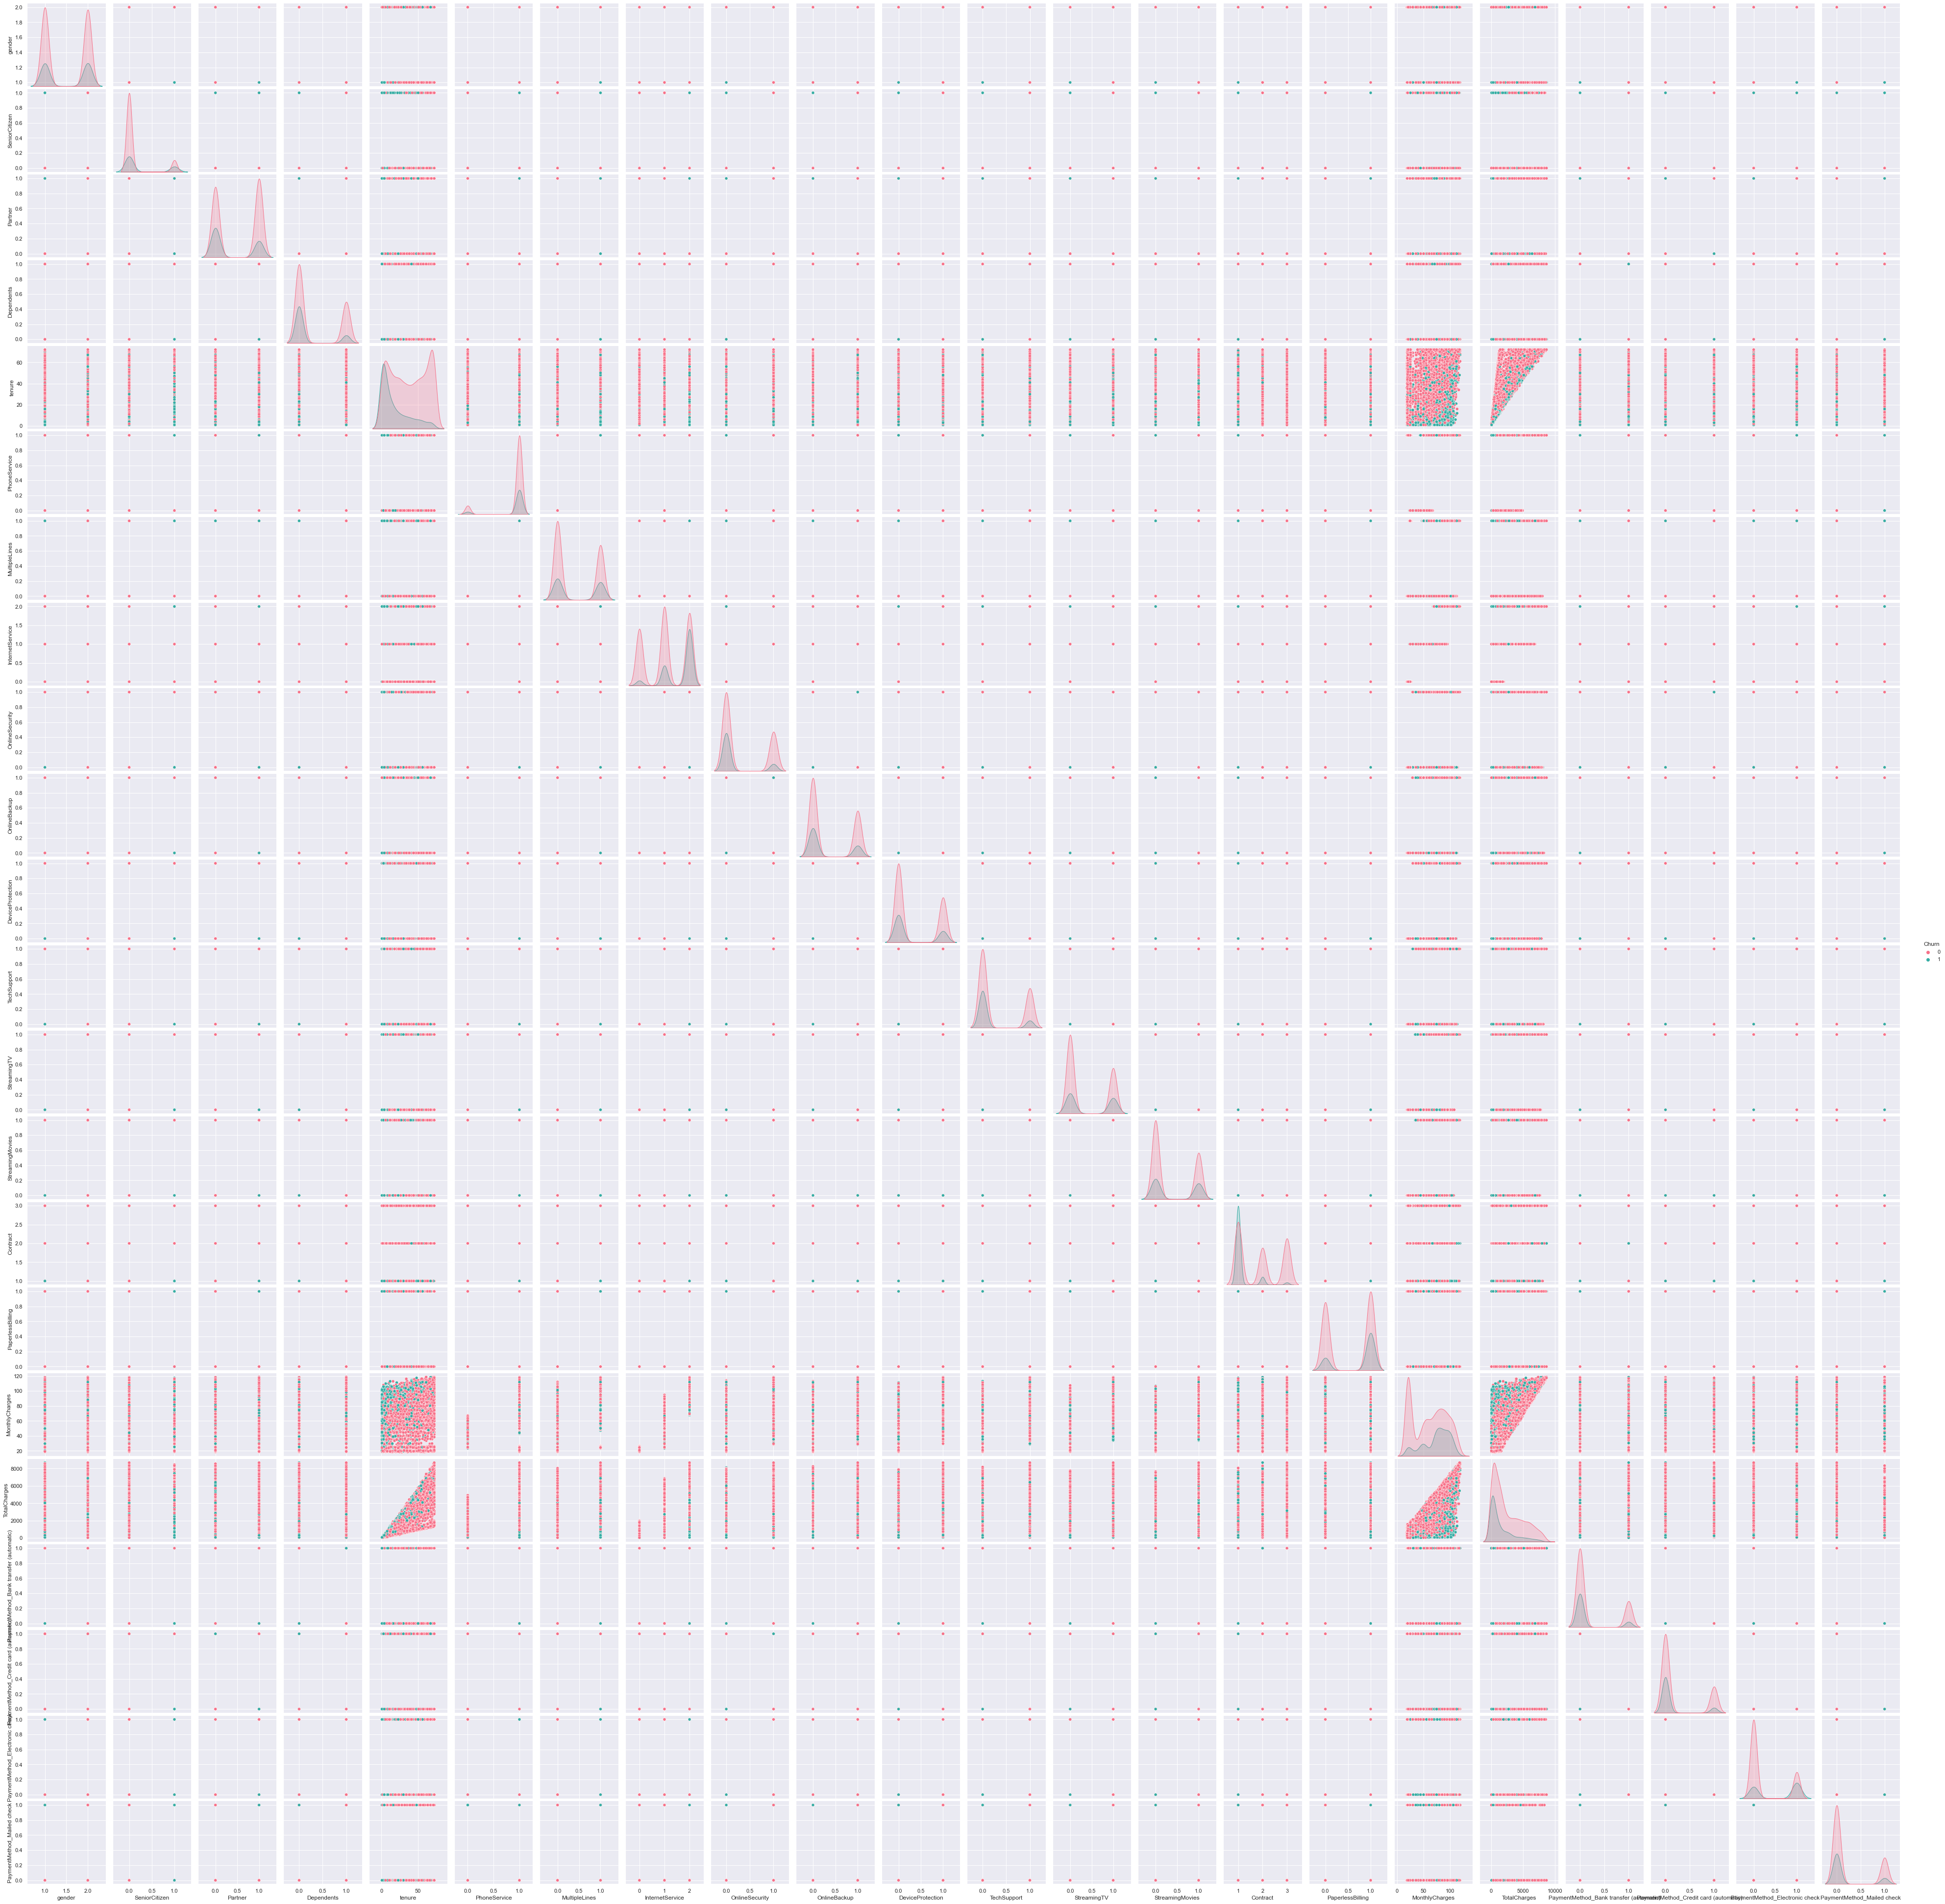

In [387]:
sns.pairplot(Data1,diag_kind='kde',hue="Churn", palette="husl") ##--commenting for quicker execution

Churn is seen among customers who pay higher Monthly Charges

## 4. Data pre-processing:
## • Segregate predictors vs target attributes
## • Check for target balancing and fix it if found imbalanced.
## • Perform train-test split.
## • Check if the train and test data have similar statistical characteristics when compared with original data.

## Solution 4.

#### Dropping CustomerId column from the dataframe as this wouldnot be required for classification

In [388]:
Data1 = Data1.drop(columns='customerID')

To maintain equal distribution of dependent variables in train and test data, I would do "Stratified" sampling while performing train-test split

In [389]:
X_train, X_test, y_train, y_test = train_test_split(Data1.loc[:, Data1.columns != 'Churn'], Data1['Churn'], test_size = 0.3, stratify=Data1['Churn'], random_state=11)

Checking the distribution of data in the train and test datasets

In [390]:
y_train.value_counts('Churn')

0    0.734254
1    0.265746
Name: Churn, dtype: float64

In [391]:
y_test.value_counts('Churn')

0    0.734123
1    0.265877
Name: Churn, dtype: float64

Both train and test datasets have equal distribution of dependent variables.
Though there is imbalance in the target variable "Chrun" in terms of counts of Yes and No values, we should be able to handle it through ensembling techniques later

Checking summary statistics for train and test datasets and checking their similarities with original dataset  

In [392]:
Data1.describe(include='all')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,1.495307,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,1.224118,0.286547,0.344852,...,0.388367,1.688567,0.592719,64.798208,2283.300441,0.265785,0.219283,0.216297,0.336320,0.228100
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.778643,0.452180,0.475354,...,0.487414,0.832934,0.491363,30.085974,2266.771362,0.441782,0.413790,0.411748,0.472483,0.419637
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,35.587500,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,70.350000,1397.475000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,2.000000,1.000000,89.862500,3794.737500,1.000000,0.000000,0.000000,1.000000,0.000000
max,2.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,3.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000


In [393]:
X_train.describe(include='all')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,...,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000
mean,1.499594,0.159894,0.484153,0.299065,32.236896,0.904714,0.412840,1.222064,0.284031,0.337668,...,0.387038,0.382162,1.678180,0.596505,64.638064,2258.957934,0.224909,0.218204,0.329947,0.226940
std,0.500051,0.366545,0.499800,0.457895,24.514766,0.293640,0.492395,0.779003,0.450997,0.472963,...,0.487122,0.485965,0.826585,0.490648,30.045752,2253.911103,0.417565,0.413069,0.470241,0.418896
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,18.400000,18.800000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,35.662500,394.287500,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,70.350000,1380.250000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,1.000000,89.850000,3733.125000,0.000000,0.000000,1.000000,0.000000
max,2.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,3.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000


In [394]:
X_test.describe(include='all')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,...,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000
mean,1.485308,0.168246,0.478673,0.297156,32.853081,0.900000,0.443128,1.228910,0.292417,0.361611,...,0.378199,0.402844,1.712796,0.583886,65.171777,2340.084242,0.206161,0.211848,0.351185,0.230806
std,0.499903,0.374174,0.499663,0.457114,24.616667,0.300071,0.496873,0.777967,0.454981,0.480581,...,0.485053,0.490586,0.847263,0.493030,30.183422,2296.025534,0.404643,0.408715,0.477454,0.421448
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,18.250000,19.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,35.412500,414.462500,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,70.400000,1442.925000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,1.000000,1.000000,56.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,3.000000,1.000000,90.150000,3919.150000,0.000000,0.000000,1.000000,0.000000
max,2.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,3.000000,1.000000,118.600000,8670.100000,1.000000,1.000000,1.000000,1.000000


Both train and test datasets have similar characteristics as that of original dataset. The continuous varables: "tenure", "MonthlyCharges" amd "TotalCharges" have similar statitical characteristics like mean, std deviation, 25%, 50%, 75% and max values 

In [395]:
y_train.describe(include='all')

count    4922.000000
mean        0.265746
std         0.441774
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Churn, dtype: float64

In [396]:
y_test.describe(include='all')

count    2110.000000
mean        0.265877
std         0.441904
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Churn, dtype: float64

Target variable "Churn" in both train and test data sets also have same unique and top values as that of original data set

## 5. Model training, testing and tuning: 
## • Train and test all ensemble models taught in the learning module.
## • Suggestion: Use standard ensembles available. Also you can design your own ensemble technique using weak classifiers.
## • Display the classification accuracies for train and test data.
## • Apply all the possible tuning techniques to train the best model for the given data.
## • Suggestion: Use all possible hyper parameter combinations to extract the best accuracies.
## • Display and compare all the models designed with their train and test accuracies.
## • Select the final best trained model along with your detailed comments for selecting this model.
## • Pickle the selected model for future use.

## Solution 5.

#### Build Decision Tree Model

In [397]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [398]:
print(dTree.score(X_train, y_train)) ## Scoring the descision tree
print(dTree.score(X_test, y_test))

0.9981714750101585
0.7203791469194313


In [399]:
#Visualizing the decision tree
train_char_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_File.close()

retCode = system("dot -Tpng credit_tree.dot -o credit_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_tree.png"))


system command returning error: 1


In [400]:
retCode = system("dot -Tpng credit_tree.dot -o credit_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_tree.png"))

system command returning error: 1


In [401]:
#Reducing over fitting (Regularization)
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.792157659488013
0.7876777251184834


In [402]:
train_char_label = ['No', 'Yes']
Credit_Tree_FileR = open('credit_treeR.dot','w')
dot_data = tree.export_graphviz(dTreeR, out_file=Credit_Tree_FileR, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_FileR.close()

#Works only if "dot" command works on you machine

retCode = system("dot -Tpng credit_treeR.dot -o credit_treeR.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_treeR.png"))

system command returning error: 1


In [403]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns))

                                              Imp
gender                                   0.000000
SeniorCitizen                            0.000000
Partner                                  0.000000
Dependents                               0.000000
tenure                                   0.205342
PhoneService                             0.000000
MultipleLines                            0.000000
InternetService                          0.179875
OnlineSecurity                           0.000000
OnlineBackup                             0.000000
DeviceProtection                         0.000000
TechSupport                              0.000000
StreamingTV                              0.000000
StreamingMovies                          0.000000
Contract                                 0.596967
PaperlessBilling                         0.000000
MonthlyCharges                           0.017815
TotalCharges                             0.000000
PaymentMethod_Bank transfer (automatic)  0.000000


Attributes which contributed significantly in arriving at the classification logic include: Contract, tenure and Internet Service, in that order

0.7876777251184834


<AxesSubplot:>

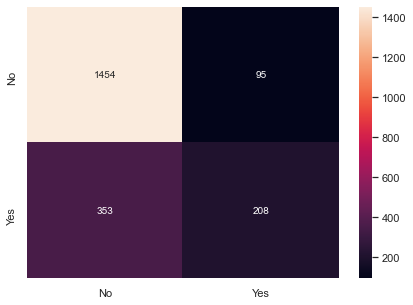

In [404]:
from sklearn import metrics
print(dTreeR.score(X_test , y_test))
y_predict = dTreeR.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

Decision Tree method of classification with max depth as 3 and 'Gini' as the criterion, resulted in an accuracy of 79%

#### Ensemble Learning - Bagging

In [405]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

0.776303317535545


<AxesSubplot:>

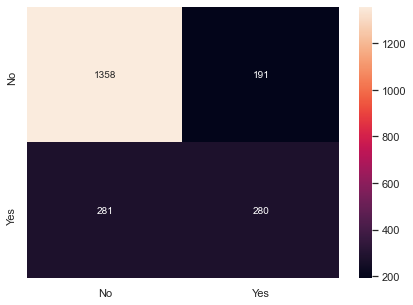

In [406]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


Bagging method of classification resulted in an accuracy of 78% with number of estimators as 50

#### Ensemble Learning - AdaBoosting

In [407]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)

0.7834123222748816


<AxesSubplot:>

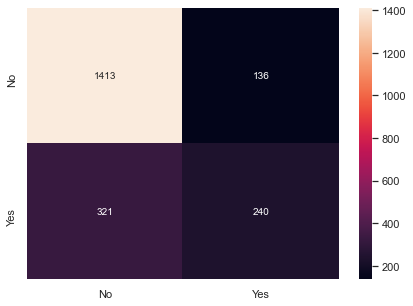

In [408]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

Ada Boosting method of classification resulted in an accuracy of 78% with number of estimators as 10

#### Ensemble Learning - GradientBoost

In [409]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)


0.7962085308056872


<AxesSubplot:>

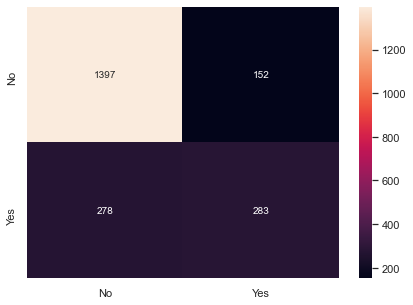

In [410]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

Gradient Boost method of classification resulted in an accuracy of 80% with number of estimators as 50

#### Ensemble RandomForest Classifier

In [411]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)

0.7791469194312797


<AxesSubplot:>

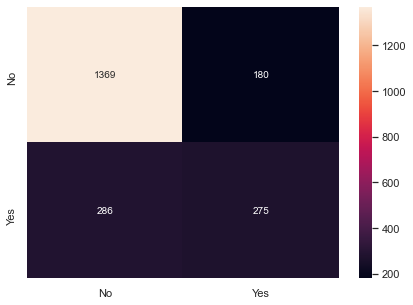

In [412]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

Random Forest Technique with 50 estimators and 12 max. features, resulted in an accuracy of 78%

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfcl_2 = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl_2 = rfcl_2.fit(X_train, y_train)

## 6. GUI Development
## • Design a clickable GUI desk application or web service application.
## • This GUI should allow the user to input all future values and on a click use these values on the trained model above to predict.
## • It should display the prediction.

## Solution 6.

In [413]:
# Import library

from tkinter import *
import re
import webbrowser
# App window
TKINTER_GUI = Tk()
TKINTER_GUI.title("AIML - EST MODULE PROJECT - GUI")

# Recieve the input------------------------------------------------------------------------------------------------

# Static text for Welcome and Instructions

Welcome_text = Label(TKINTER_GUI, text="Welcome to the Churn Predictor!", font=("Arial", 20))
Welcome_text.grid(column=1, row=0)  

Instruction_text = Label(TKINTER_GUI, text="To input future prediction values, either provide the future prediction filename \n below or incase you don't have the input file template, kindlly download the template, \n provide future prediction values for each column and import the file")
Instruction_text.grid(column=1, row=1)   


def callback():
    webbrowser.open_new('https://drive.google.com/uc?export=download&id=1xBhkz3o6NTj8kQfhwRRme6vaYLuJeCO_')

# Button to download the input file template
BUTTON_download_input_template = Button(TKINTER_GUI, text="Download Input file template", command=callback)
BUTTON_download_input_template.grid(column=1, row=2) 


# Static text related to Future Prediction
Prediction_static_text2 = Label(TKINTER_GUI, text="Future Prediction file name:")
Prediction_static_text2.grid(column=0, row=5)  

# Import the future prediction file
Prediction_file_name = StringVar()
Prediction_file_entrybox = Entry(TKINTER_GUI, width = 16, textvariable = Prediction_file_name)
Prediction_file_entrybox.grid(row=5, column =1)


def Import_data():
    global DB
    DF_Name = Prediction_file_name.get()
    DB_extension = re.findall("\..*", DF_Name)
    if DB_extension ==['.csv']:
        DB = pd.read_csv(DF_Name)
    elif DB_extension ==['.xlsx']:
        DB = pd.read_excel(DF_Name)
    # Blank emoty window to show confirmation
    confirm = "Done"
    Confirm_entrybox = Entry(TKINTER_GUI, width=16)
    Confirm_entrybox.grid(row=6, column=2)
    Confirm_entrybox.insert(1, str(confirm))


# Button to Import Future Data
BUTTON_Import_Future_Data = Button(TKINTER_GUI, text="Import Future Prediction Data", command=Import_data)
BUTTON_Import_Future_Data.grid(column=1, row=6) # 1 row, 3 col


# Static text labels for Churn fields
Churn_Label_1 = Label(TKINTER_GUI, text="Whether customer would churn out (1= Yes, 0 = No)")
Churn_Label_1.grid(column=1, row=7)  

Churn_Label_2 = Label(TKINTER_GUI, text="Whether customer would churn out (1= Yes, 0 = No)")
Churn_Label_2.grid(column=1, row=8)  

Churn_Label_3 = Label(TKINTER_GUI, text="Whether customer would churn out (1= Yes, 0 = No)")
Churn_Label_3.grid(column=1, row=9)  

Churn_Label_4 = Label(TKINTER_GUI, text="Whether customer would churn out (1= Yes, 0 = No)")
Churn_Label_4.grid(column=1, row=10)  

Churn_Label_5 = Label(TKINTER_GUI, text="Whether customer would churn out (1= Yes, 0 = No)")
Churn_Label_5.grid(column=1, row=11)  



# Predict the outcome------------------------------------------------------------------------------------------------

# Run respective classifiers
def Run_DT():
    y_pred_DT=dTreeR.predict(DB)
    # Result window to show predicted value
    Result_entrybox_DT = Entry(TKINTER_GUI, width=16)
    Result_entrybox_DT.grid(row=7, column=2)
    Result_entrybox_DT.insert(1, str(y_pred_DT))

def Run_BC():
    y_pred_BC=bgcl.predict(DB)
    # Result window to show predicted value
    Result_entrybox_BC = Entry(TKINTER_GUI, width=16)
    Result_entrybox_BC.grid(row=8, column=2)
    Result_entrybox_BC.insert(1, str(y_pred_BC))
    
def Run_AB():
    y_pred_AB=abcl.predict(DB)
    # Result window to show predicted value
    Result_entrybox_AB = Entry(TKINTER_GUI, width=16)
    Result_entrybox_AB.grid(row=9, column=2)
    Result_entrybox_AB.insert(1, str(y_pred_AB))
    
def Run_GB():
    y_pred_GB=gbcl.predict(DB)
    # Result window to show predicted value
    Result_entrybox_GB = Entry(TKINTER_GUI, width=16)
    Result_entrybox_GB.grid(row=10, column=2)
    Result_entrybox_GB.insert(1, str(y_pred_GB))
    
def Run_RF():
    y_pred_RF=rfcl.predict(DB)
    # Result window to show predicted value
    Result_entrybox_RF = Entry(TKINTER_GUI, width=16)
    Result_entrybox_RF.grid(row=11, column=2)
    Result_entrybox_RF.insert(1, str(y_pred_RF))

# Buttons to Run the chosen model for prediction
BUTTON_DT = Button(TKINTER_GUI, text="Run Decision Tree Classifier (max depth =3)", command=Run_DT)
BUTTON_DT.grid(column=0, row=7) # 0 row, 3 col

BUTTON_BC = Button(TKINTER_GUI, text="Run Bagging Classifier", command=Run_BC)
BUTTON_BC.grid(column=0, row=8) # 0 row, 3 col

BUTTON_AB = Button(TKINTER_GUI, text=" Run Ada Boosting Classifier", command=Run_AB)
BUTTON_AB.grid(column=0, row=9) # 0 row, 3 col

BUTTON_GB = Button(TKINTER_GUI, text=" Run Gradient Boost Classifier", command=Run_GB)
BUTTON_GB.grid(column=0, row=10) # 0 row, 3 col

BUTTON_RF = Button(TKINTER_GUI, text=" Run Random Forest Classifier", command=Run_RF)
BUTTON_RF.grid(column=0, row=11) # 0 row, 3 col



# App closure
TKINTER_GUI.mainloop()

## 7. Conclusion and improvisation:
## • Write your conclusion on the results
## •  Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the telecom operator to perform a better data analysis in future.


## Solution 7.

### Conclusions
- While all models gave accuracy of approximately 80%, we observed the highest accuracy in Gradient Bossting Technique with number of estimators as 50
- Decision Tree classifier resulted into overfitting (train data accuracy of ~100% and that of test data as 72%)  when we didin't pass any maximum depth parameter. However, the same got balanced on passing 'Gini' as the criterion and maximum depth of 3
- Automation of repetitive tasks like: Data cleansing, treatment of junk values, helped saving lot of time in data processing. These independent functions can be leveraged into futute projects as well for more productivity
- The given data of continuous variables was free of outliers which helped in saving efforts in pre-processing the same 

#### Suggestions/ Improvements
- There was an imbalance in the target variable data "Churn" with 73% 'No' and 26% 'Yes' values which could have been more balanced to have better accuracy of prediction